# LDSA CAPSTONE PROJECT | EXPLORATORY DATA ANALYSIS

## 1. IMPORT MODULES

In [1]:
import os
import pandas as pd
import numpy as np

## 2. Load Data

In [2]:
def load_data(file):
    df = pd.read_csv(os.path.join("data", file),index_col='id')
    return df
data = load_data("two-years-recid.csv")
data.head()

name     sex         dob  age              race  \
id                                                                 
1          steven lux    Male  1953-06-15   62         Caucasian   
2         andre small    Male  1987-10-01   28  African-American   
3         willie gray    Male  1959-01-12   57  African-American   
4   nickson marcellus    Male  1996-07-11   19  African-American   
5       patria barnes  Female  1978-06-06   37             Other   

              c_jail_in           c_jail_out  c_case_number c_offense_date  \
id                                                                           
1   2013-01-05 04:35:31  2013-01-07 03:18:03  13000208CF10A     2013-01-05   
2   2013-04-02 12:18:46  2013-04-04 07:54:22  13006354MM10A     2013-04-02   
3   2014-10-31 12:02:01  2014-10-31 01:47:05  14040148MU10A     2014-10-30   
4   2014-01-23 03:19:30  2014-01-23 01:04:34  13017969CF10A            NaN   
5   2013-12-08 01:55:28  2013-12-09 02:00:59  13022717MM10A     2013-12-07   

   c_arrest_date  ...  r_case_number r_offense_date  r_charge_degree  \
id                ...                                                  
1            NaN  ...            NaN            NaN              NaN   
2            NaN  ...            NaN            NaN              NaN   
3            NaN  ...  15043364TC20A     2015-07-23             (M2)   
4     2014-01-23  ...  16000241MM20A     2016-01-04             (M1)   
5            NaN  ...            NaN            NaN              NaN   

                        r_charge_desc  is_violent_recid  vr_case_number  \
id                                                                        
1                                 NaN                 0             NaN   
2                                 NaN                 0             NaN   
3           Driving License Suspended                 0             NaN   
4   Possess Cannabis/20 Grams Or Less                 0             NaN   
5                                 NaN                 0             NaN   

   vr_offense_date vr_charge_degree  vr_charge_desc two_year_recid  
id                                                                  
1              NaN              NaN             NaN              0  
2              NaN              NaN             NaN              0  
3              NaN              NaN             NaN              1  
4              NaN              NaN             NaN              1  
5              NaN              NaN             NaN              0  

[5 rows x 34 columns]

## 3. EDA | Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6114 entries, 1 to 6114
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   6114 non-null   object
 1   sex                    6114 non-null   object
 2   dob                    6114 non-null   object
 3   age                    6114 non-null   int64 
 4   race                   6114 non-null   object
 5   c_jail_in              5854 non-null   object
 6   c_jail_out             5854 non-null   object
 7   c_case_number          6096 non-null   object
 8   c_offense_date         5155 non-null   object
 9   c_arrest_date          941 non-null    object
 10  c_charge_degree        6114 non-null   object
 11  c_charge_desc          6090 non-null   object
 12  juv_fel_count          6114 non-null   int64 
 13  juv_misd_count         6114 non-null   int64 
 14  juv_other_count        6114 non-null   int64 
 15  priors_count           611

In [4]:
data.describe()

age  juv_fel_count  juv_misd_count  juv_other_count  \
count  6114.000000    6114.000000     6114.000000      6114.000000   
mean     34.757442       0.062643        0.090939         0.104351   
std      11.802448       0.396906        0.486264         0.448095   
min      18.000000       0.000000        0.000000         0.000000   
25%      25.000000       0.000000        0.000000         0.000000   
50%      31.000000       0.000000        0.000000         0.000000   
75%      42.000000       0.000000        0.000000         0.000000   
max      96.000000      10.000000       13.000000         9.000000   

       priors_count  decile_score  v_decile_score     is_recid  \
count   6114.000000   6114.000000     6114.000000  6114.000000   
mean       3.438502      4.488878        3.688584     0.479392   
std        4.858464      2.849050        2.503754     0.499616   
min        0.000000      1.000000        1.000000     0.000000   
25%        0.000000      2.000000        1.000000     0.000000   
50%        2.000000      4.000000        3.000000     0.000000   
75%        5.000000      7.000000        5.000000     1.000000   
max       38.000000     10.000000       10.000000     1.000000   

       is_violent_recid  two_year_recid  
count       6114.000000     6114.000000  
mean           0.113510        0.450114  
std            0.317241        0.497546  
min            0.000000        0.000000  
25%            0.000000        0.000000  
50%            0.000000        0.000000  
75%            0.000000        1.000000  
max            1.000000        1.000000

### 3.1 Feature Analysis

In [5]:
def analyze_dataset(df, target, datetime_columns=None):
    """
    Analyzes the dataset for key characteristics, including feature type, missing values, and target identification.

    Parameters:
    - df (pd.DataFrame): The dataset to analyze.
    - targe (list): A list of columns that represent targets.
    - datetime_columns (list): A list of columns to explicitly convert to datetime objects.

    Returns:
    - pd.DataFrame: A DataFrame summarizing the analysis of each feature.
    """
    # Convert specified columns to datetime if datetime_columns is provided
    if datetime_columns:
        for col in datetime_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')

    # Initialize the feature analysis dictionary
    feature_analysis = {
        'Feature': [],
        'Type': [],
        'Total Values': [],
        'Missing Values': [],
        'Unique Value Count (Categorical)': [],
        'Unique Values (Categorical)': [],
        'Is Target': []
    }

    # Analyze each column
    for col in df.columns:
        feature_analysis['Feature'].append(col)
        feature_analysis['Total Values'].append(len(df[col]))
        feature_analysis['Missing Values'].append(df[col].isnull().sum())

        # Determine the variable type
        if pd.api.types.is_numeric_dtype(df[col]):
            feature_analysis['Type'].append('Numerical')
            feature_analysis['Unique Value Count (Categorical)'].append(None)
            feature_analysis['Unique Values (Categorical)'].append(None)
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            feature_analysis['Type'].append('Datetime')
            feature_analysis['Unique Value Count (Categorical)'].append(None)
            feature_analysis['Unique Values (Categorical)'].append(None)
        else:
            feature_analysis['Type'].append('Categorical')
            unique_vals = df[col].unique().tolist()
            feature_analysis['Unique Value Count (Categorical)'].append(len(unique_vals))
            feature_analysis['Unique Values (Categorical)'].append(unique_vals)

        # Identify if the column is a feature or a target
        feature_analysis['Is Target'].append(col in target)

    # Create a DataFrame from the analysis dictionary
    feature_analysis_df = pd.DataFrame(feature_analysis)

    return feature_analysis_df

In [6]:
# Define your target columns
target = ['is_recid', 'is_violent_recid']
datetime_columns = ['dob','c_jail_in',
                    'c_jail_out',
                    'c_offense_date',
                    'c_arrest_date',
                    'compas_screening_date',
                    'r_offense_date',
                    'vr_offense_date'
                   ]

# Call the function
analysis_results = analyze_dataset(data, target,datetime_columns)
analysis_results

Feature         Type  Total Values  Missing Values  \
0                    name  Categorical          6114               0   
1                     sex  Categorical          6114               0   
2                     dob     Datetime          6114               0   
3                     age    Numerical          6114               0   
4                    race  Categorical          6114               0   
5               c_jail_in     Datetime          6114             260   
6              c_jail_out     Datetime          6114             260   
7           c_case_number  Categorical          6114              18   
8          c_offense_date     Datetime          6114             959   
9           c_arrest_date     Datetime          6114            5173   
10        c_charge_degree  Categorical          6114               0   
11          c_charge_desc  Categorical          6114              24   
12          juv_fel_count    Numerical          6114               0   
13         juv_misd_count    Numerical          6114               0   
14        juv_other_count    Numerical          6114               0   
15           priors_count    Numerical          6114               0   
16  compas_screening_date     Datetime          6114               0   
17     type_of_assessment  Categorical          6114               0   
18           decile_score    Numerical          6114               0   
19             score_text  Categorical          6114               0   
20   v_type_of_assessment  Categorical          6114               0   
21         v_decile_score    Numerical          6114               0   
22           v_score_text  Categorical          6114               0   
23               is_recid    Numerical          6114               0   
24          r_case_number  Categorical          6114            3183   
25         r_offense_date     Datetime          6114            3183   
26        r_charge_degree  Categorical          6114            3183   
27          r_charge_desc  Categorical          6114            3232   
28       is_violent_recid    Numerical          6114               0   
29         vr_case_number  Categorical          6114            5420   
30        vr_offense_date     Datetime          6114            5420   
31       vr_charge_degree  Categorical          6114            5420   
32         vr_charge_desc  Categorical          6114            5420   
33         two_year_recid    Numerical          6114               0   

    Unique Value Count (Categorical)  \
0                             6079.0   
1                                2.0   
2                                NaN   
3                                NaN   
4                                6.0   
5                                NaN   
6                                NaN   
7                             6097.0   
8                                NaN   
9                                NaN   
10                               2.0   
11                             409.0   
12                               NaN   
13                               NaN   
14                               NaN   
15                               NaN   
16                               NaN   
17                               1.0   
18                               NaN   
19                               3.0   
20                               1.0   
21                               NaN   
22                               3.0   
23                               NaN   
24                            2932.0   
25                               NaN   
26                              11.0   
27                             314.0   
28                               NaN   
29                             695.0   
30                               NaN   
31                              10.0   
32                              76.0   
33                               NaN   

                          Unique Values (Categorical)  Is Target  
0   [steven lux, andre small,

### 3.2 Create and Check lists of column types

In [7]:
# check date columns
data[datetime_columns].dtypes

dob                      datetime64[ns]
c_jail_in                datetime64[ns]
c_jail_out               datetime64[ns]
c_offense_date           datetime64[ns]
c_arrest_date            datetime64[ns]
compas_screening_date    datetime64[ns]
r_offense_date           datetime64[ns]
vr_offense_date          datetime64[ns]
dtype: object

In [8]:
# Identify categorical columns by checking the data types
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Display the list of categorical columns
data[categorical_columns].dtypes


name                    object
sex                     object
race                    object
c_case_number           object
c_charge_degree         object
c_charge_desc           object
type_of_assessment      object
score_text              object
v_type_of_assessment    object
v_score_text            object
r_case_number           object
r_charge_degree         object
r_charge_desc           object
vr_case_number          object
vr_charge_degree        object
vr_charge_desc          object
dtype: object

In [9]:
# Identify numeric columns by checking the data types
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()

# Display the list of numeric columns
data[numeric_columns].dtypes


age                 int64
juv_fel_count       int64
juv_misd_count      int64
juv_other_count     int64
priors_count        int64
decile_score        int64
v_decile_score      int64
is_recid            int64
is_violent_recid    int64
two_year_recid      int64
dtype: object

### 3.3 Create list of columns related to current prediction model

In [10]:
current_model_columns = [
    'compas_screening_date',
    'type_of_assessment',
    'decile_score',
    'score_text',
    'v_type_of_assessment',
    'v_decile_score',
    'v_score_text'
]
current_model_columns

['compas_screening_date',
 'type_of_assessment',
 'decile_score',
 'score_text',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text']

### 3.4 Dataset Vizualizations

/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be

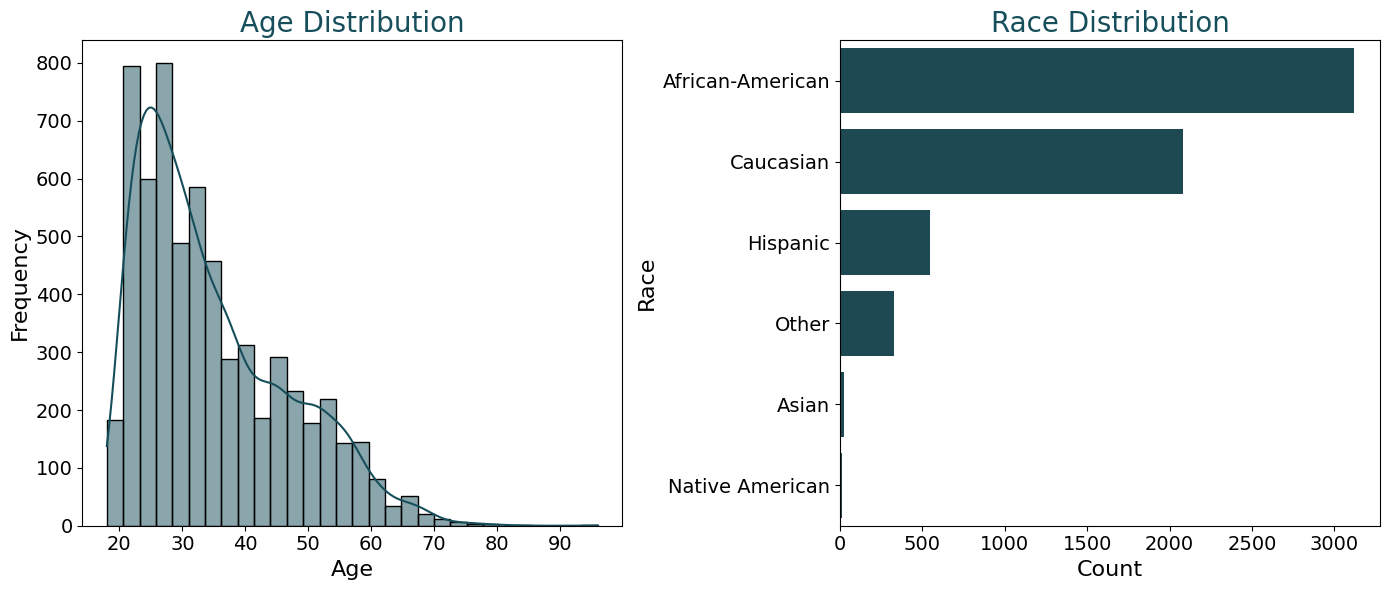

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Primary color derived from the report template colors
primary_color = '#164f5b'

# Create a figure to hold the subplots for charts 1 and 2
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of ages with custom color
sns.histplot(data['age'], bins=30, kde=True, color=primary_color, ax=axes[0])
axes[0].set_title('Age Distribution', color=primary_color,fontsize=20)
axes[0].set_xlabel('Age',fontsize=16)
axes[0].set_ylabel('Frequency',fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# Count plot for race with custom color
sns.countplot(y=data['race'], ax=axes[1], order=data['race'].value_counts().index, color=primary_color)
axes[1].set_title('Race Distribution', color=primary_color,fontsize=20)
axes[1].set_xlabel('Count',fontsize=16)
axes[1].set_ylabel('Race',fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

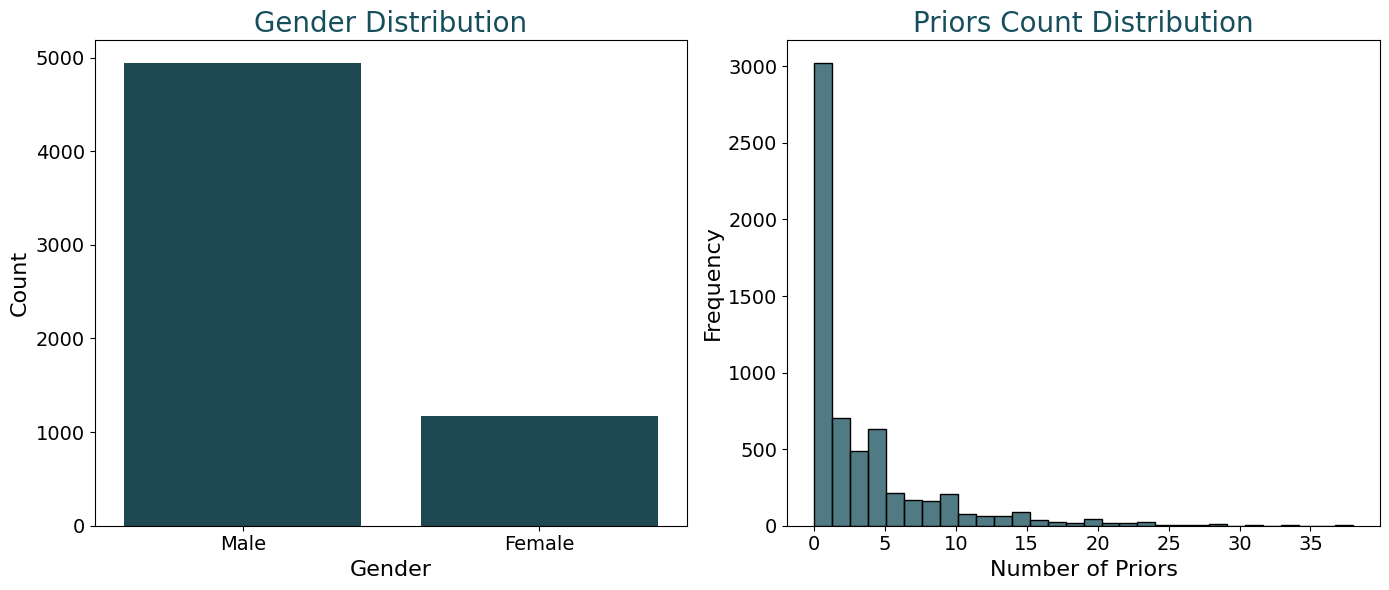

In [12]:
# Create a figure to hold the subplots for charts 3 and 4
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for sex with custom color
sns.countplot(x=data['sex'], ax=axes[0], color=primary_color)
axes[0].set_title('Gender Distribution', color=primary_color,fontsize=20)
axes[0].set_xlabel('Gender',fontsize=16)
axes[0].set_ylabel('Count',fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# Histogram of priors count with custom color
sns.histplot(data['priors_count'], bins=30, kde=False, color=primary_color, ax=axes[1])
axes[1].set_title('Priors Count Distribution', color=primary_color,fontsize=20)
axes[1].set_xlabel('Number of Priors',fontsize=16)
axes[1].set_ylabel('Frequency',fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


### 4. Compass model Bias Evaluation

After analysis of the Compas model related columns we can see that columns: 'compas_screening_date', 'type_of_assessment', 'decile_score', 'score_text', 'v_type_of_assessment', 'v_decile_score', 'v_score_text' all have data about risk assessment of recidivism. To create a simple form of evaluating possible bias of this model we are going to create a new feature compass_recidivism_prediction that has the a true or false prediction if decile_score >=8 or v_decile >= 8


/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

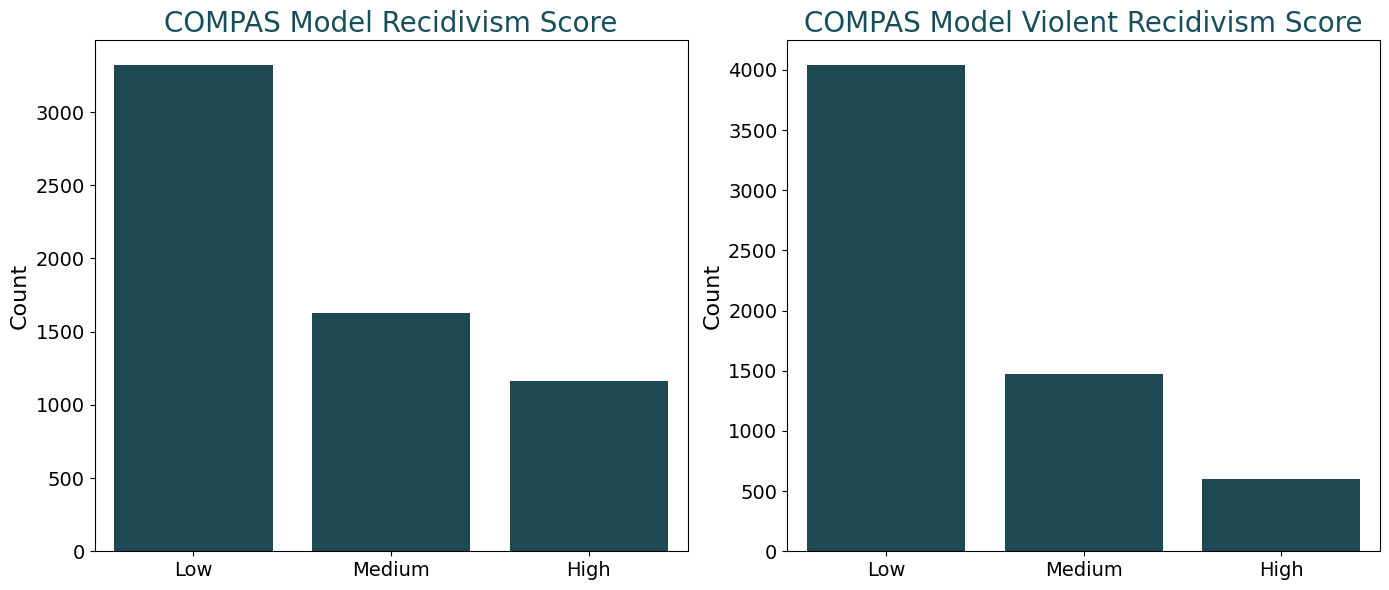

In [13]:
# Create a figure to hold the subplots for recidivism scores
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for recidivism risk score text with updated title and without x-label
sns.countplot(x=data['score_text'], ax=axes[0], order=["Low", "Medium", "High"], color=primary_color)
axes[0].set_title('COMPAS Model Recidivism Score', color=primary_color,fontsize=20)
axes[0].set_xlabel('',fontsize=16)
axes[0].set_ylabel('Count',fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# Count plot for violent recidivism score text with updated title and without x-label
sns.countplot(x=data['v_score_text'], ax=axes[1], order=["Low", "Medium", "High"], color=primary_color)
axes[1].set_title('COMPAS Model Violent Recidivism Score', color=primary_color,fontsize=20)
axes[1].set_xlabel('',fontsize=16)
axes[1].set_ylabel('Count',fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [14]:
# Create a new feature 'compass_recidivism_prediction' based on the given condition
data['compass_recidivism_prediction'] = (data['decile_score'] >= 8) | (data['v_decile_score'] >= 8)

# Convert boolean to integer for easier analysis (True -> 1, False -> 0)
data['compass_recidivism_prediction'] = data['compass_recidivism_prediction'].astype(int)

# Display the first few rows to verify the new feature
data[['decile_score', 'v_decile_score', 'compass_recidivism_prediction']].head()


decile_score  v_decile_score  compass_recidivism_prediction
id                                                             
1              1               1                              0
2              3               3                              0
3              4               2                              0
4             10              10                              1
5              1               1                              0

To evaluate bias in the COMPAS recidivism screening model towards ethnic or demographic groups, it's important to select metrics that reflect both fairness and performance. Given the goals of minimizing false positives while maintaining good prediction accuracy, the following metrics are recommended:

False Positive Rate (FPR): This measures the proportion of individuals who were incorrectly predicted to re-offend among those who did not actually re-offend. Minimizing false positives is crucial to avoid unfairly penalizing individuals.

Accuracy: This measures the proportion of correct predictions (both true positives and true negatives) among the total number of cases. Ensuring that the overall accuracy remains above 80% indicates that the model is performing well overall.

False Positive Rate Disparity: This metric compares the false positive rates across different groups (e.g., racial or demographic groups). A significant disparity indicates potential bias.

Balanced Accuracy: This is the average of the true positive rate and the true negative rate. It accounts for class imbalance and provides a more balanced view of the model's performance.

Proposed Metric
Considering the need to minimize false positives while maintaining high accuracy, Balanced Accuracy is a suitable metric. It ensures that the model is equally accurate across both classes (recidivists and non-recidivists), which helps in addressing any class imbalances. Additionally, to directly address bias:

False Positive Rate (FPR) should be evaluated separately for each demographic group to identify and minimize disparities.
Implementation Steps
Calculate Balanced Accuracy: This ensures the model is performing well across both recidivists and non-recidivists.

Evaluate FPR for each Group: Calculate the false positive rates for different racial, age, and sex groups to identify potential biases.

Typical age groups considered for crime analysis are often based on developmental stages and significant legal age thresholds. Here are common age groups:

Juveniles (Under 18):

0-12 (Children)
13-17 (Teenagers)
Young Adults (18-24):

18-20 (Late Teens)
21-24 (Early Twenties)
Adults (25-44):

25-34 (Young Adults)
35-44 (Middle-Aged Adults)
Older Adults (45 and above):

45-54 (Pre-Seniors)
55-64 (Early Seniors)
65+ (Seniors)
These groups are based on common legal definitions and developmental stages relevant to crime and recidivism analysis.

In [15]:
# categorize age
# Define a function to categorize age into age groups
def categorize_age(age):
    if age < 13:
        return '0-12'
    elif age < 18:
        return '13-17'
    elif age < 21:
        return '18-20'
    elif age < 25:
        return '21-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

# Create the new feature 'age_group'
data['age_group'] = data['age'].apply(categorize_age)

# Display the first few rows to verify the new feature
print(data[['age', 'age_group']])

      age age_group
id                 
1      62     55-64
2      28     25-34
3      57     55-64
4      19     18-20
5      37     35-44
...   ...       ...
6110   28     25-34
6111   30     25-34
6112   33     25-34
6113   27     25-34
6114   24     21-24

[6114 rows x 2 columns]


### 5. Build the target for model training

In [16]:
# Create the target label from is_recid and is_violent_recid. If one of them is True then the target is True.

# Create a new feature 'build_target' based on the given condition
data['composite_target'] = (data['is_recid'] == True) | (data['is_violent_recid'] == True)

# Convert boolean to integer for easier analysis (True -> 1, False -> 0)
data['composite_target'] = data['composite_target'].astype(int)

# Display the first few rows to verify the new feature
data[['is_recid', 'is_violent_recid', 'composite_target']].head()

is_recid  is_violent_recid  composite_target
id                                              
1          0                 0                 0
2          0                 0                 0
3          1                 0                 1
4          1                 0                 1
5          0                 0                 0

### 6. Let's analyze COMPAS model performance

#### 6.1 Lets calculate the metrics for general population

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def calculate_metrics(true_labels, predictions):
    """
    Calculate various classification metrics for a given set of true labels and predictions.

    Parameters:
    true_labels : array-like of shape (n_samples,)
        The true labels for the data.
    predictions : array-like of shape (n_samples,)
        The predicted labels.

    Returns:
    pd.DataFrame
        A DataFrame containing the calculated metrics.
    """
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    auc_roc = roc_auc_score(true_labels, predictions)

    conf_matrix = confusion_matrix(true_labels, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()

    fpr = fp / (fp + tn)
    tnr = tn / (tn + fp)
    balanced_accuracy = (recall + tnr) / 2

    metrics = {
        #'Accuracy': accuracy,
        #'Precision': precision,
        #'Recall': recall,
        'F1-score': f1,
        #'AUC-ROC': auc_roc,
        'False Positive Rate': fpr,
        #'True Negative Rate': tnr,
        #'Balanced Accuracy': balanced_accuracy
    }

    return pd.DataFrame(metrics, index=['General Population Metrics'])

# Define the true labels and predictions
true_labels = data['composite_target']
predictions = data['compass_recidivism_prediction']

df_general_population_metrics = calculate_metrics(true_labels, predictions)
df_general_population_metrics

F1-score  False Positive Rate
General Population Metrics  0.447719             0.105247

#### 6.1.1 F1-score calculation check

In [18]:
from sklearn.metrics import classification_report

# Evaluate the Compass model
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.59      0.89      0.71      3183
           1       0.74      0.32      0.45      2931

    accuracy                           0.62      6114
   macro avg       0.66      0.61      0.58      6114
weighted avg       0.66      0.62      0.58      6114



#### 6.2 Metrics across race category

In [19]:
# Function to handle division safely
def safe_div(numerator, denominator):
    return numerator / denominator if denominator else 0

def calculate_group_metrics(data, group_by_column, target_column, prediction_column):
    """
    Calculate various classification metrics for different groups within a dataset.

    Parameters:
    data : pd.DataFrame
        The dataset containing the true labels, predictions, and group information.
    group_by_column : str
        The column name to group by (e.g., 'race', 'age').
    target_column : str
        The column name for the true labels.
    prediction_column : str
        The column name for the predictions.

    Returns:
    pd.DataFrame
        A DataFrame containing the calculated metrics for each group.
    """
    def compute_metrics(group):
        true_labels = group[target_column]
        predictions = group[prediction_column]

        accuracy = accuracy_score(true_labels, predictions)
        precision = precision_score(true_labels, predictions, zero_division=0)
        recall = recall_score(true_labels, predictions)
        f1 = f1_score(true_labels, predictions, zero_division=0)
        auc_roc = roc_auc_score(true_labels, predictions)

        conf_matrix = confusion_matrix(true_labels, predictions)
        tn, fp, fn, tp = conf_matrix.ravel()

        fpr = safe_div(fp, (fp + tn))
        tnr = safe_div(tn, (tn + fp))
        balanced_accuracy = (recall + tnr) / 2

        return {
            #'Accuracy': accuracy,
            #'Precision': precision,
            #'Recall': recall,
            'F1-score': f1,
            #'AUC-ROC': auc_roc,
            'False Positive Rate': fpr,
            #'True Negative Rate': tnr,
            #'Balanced Accuracy': balanced_accuracy
        }

    group_metrics = data.groupby(group_by_column).apply(lambda x: pd.Series(compute_metrics(x)))
    return group_metrics.reset_index()


race_metrics = calculate_group_metrics(data, 'race', 'composite_target', 'compass_recidivism_prediction')
race_metrics


race  F1-score  False Positive Rate
0  African-American  0.525398             0.167728
1             Asian  0.428571             0.000000
2         Caucasian  0.333038             0.055418
3          Hispanic  0.272059             0.071642
4   Native American  0.600000             0.000000
5             Other  0.248276             0.034146

#### 6.4 Metrics across Gender

In [20]:
gender_metrics = calculate_group_metrics(data, 'sex', 'composite_target', 'compass_recidivism_prediction')
gender_metrics

sex  F1-score  False Positive Rate
0  Female  0.331126             0.086839
1    Male  0.467259             0.110793

#### 6.5 Metrics across criminal charge

In [21]:
charge_degree_metrics = calculate_group_metrics(data, 'c_charge_degree', 'composite_target', 'compass_recidivism_prediction')
charge_degree_metrics

c_charge_degree  F1-score  False Positive Rate
0               F  0.482392             0.126490
1               M  0.360601             0.072568

### 7. Let's create some visualizations of these metrics

In [22]:
def plot_category_metrics_with_general_overlay(metrics_df, general_metrics_df, primary_color, legend_local):
    """
    Plots bar charts for metrics (F1-score and False Positive Rate) per category with an overlay of general population metrics.

    Parameters:
    - metrics_df: DataFrame with metrics per category indexed by the category (e.g., race).
    - general_metrics_df: DataFrame with general population metrics. Should have the same metric columns as metrics_df.
    - primary_color: Color code for the category bars in the plot.
    """
    # Setup the plotting area
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # Assume there are always two metrics
    
    # Define the metrics to plot
    metrics_to_plot = ['F1-score', 'False Positive Rate']
    
    for idx, metric in enumerate(metrics_to_plot):
        # Bar chart for each metric
        axes[idx].bar(metrics_df.index, metrics_df[metric], color=primary_color, label=metrics_df.index.name)
        
        # Overlay the general population metric as a horizontal line
        general_metric_value = general_metrics_df[metric].values[0]  # Correctly access the scalar value
        axes[idx].axhline(y=general_metric_value, color='red', linestyle='--', label='General Population Metric')
        
        axes[idx].set_title(f'{metric}', fontsize=16, color=primary_color)
        #axes[idx].set_xlabel('Category', fontsize=14)
        #axes[idx].set_ylabel(metric, fontsize=14)
        axes[idx].tick_params(axis='x', labelrotation=0, labelsize=13)
        #axes[idx].legend(fontsize=14,loc=legend_local)
        axes[idx].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=14, ncol=1)

    plt.tight_layout()
    plt.show()



#### 7.1 Race metrics Visualization

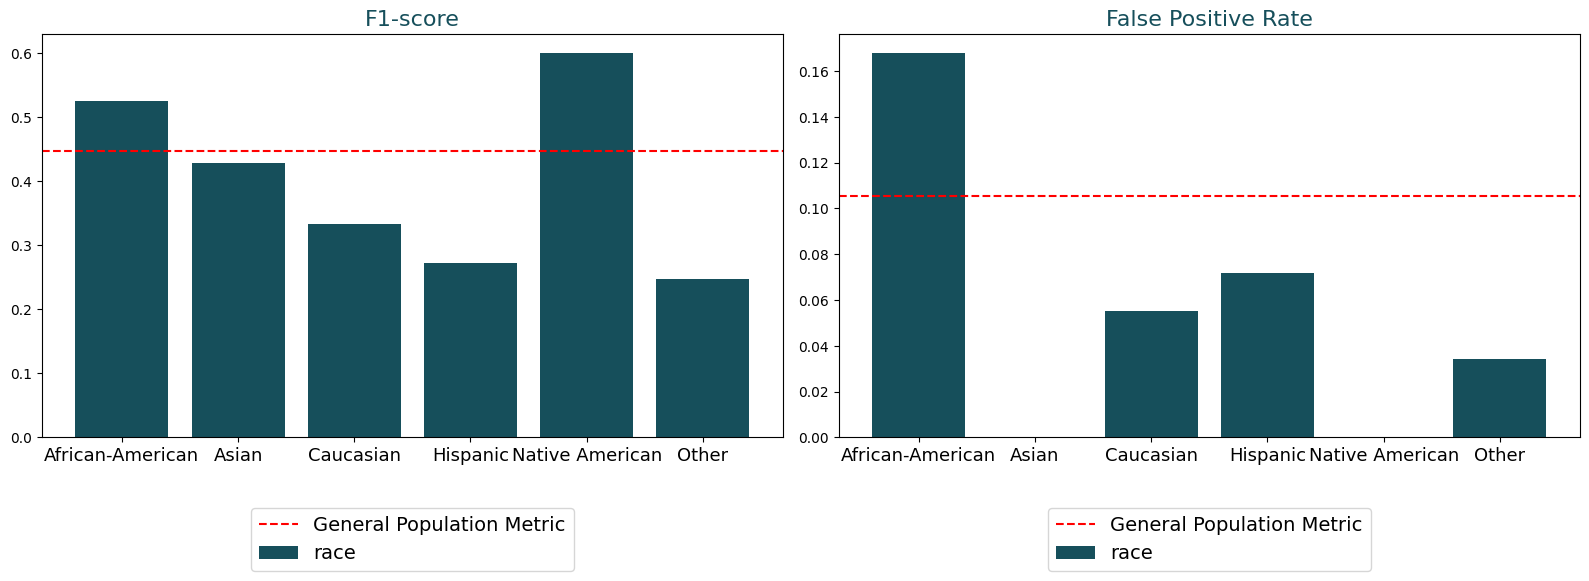

In [23]:
race_metrics.set_index('race', inplace=True)
legend_local = 'upper right'
plot_category_metrics_with_general_overlay(race_metrics, df_general_population_metrics, primary_color,legend_local)

#### 7.2 Gender metrics Visualization

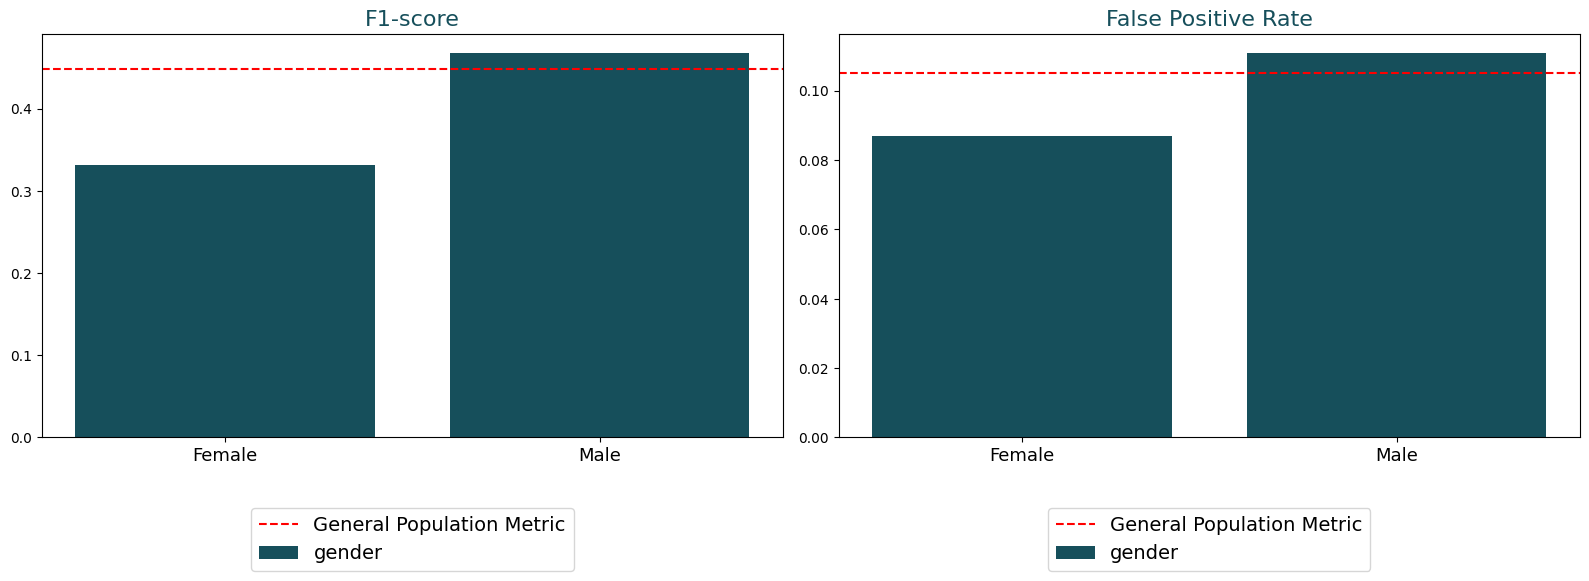

In [24]:
gender_metrics.set_index('sex', inplace=True)
gender_metrics.index.name = 'gender'
legend_local = 'lower right'
plot_category_metrics_with_general_overlay(gender_metrics, df_general_population_metrics, primary_color,legend_local)

#### 7.3 Charge Degree Visualization

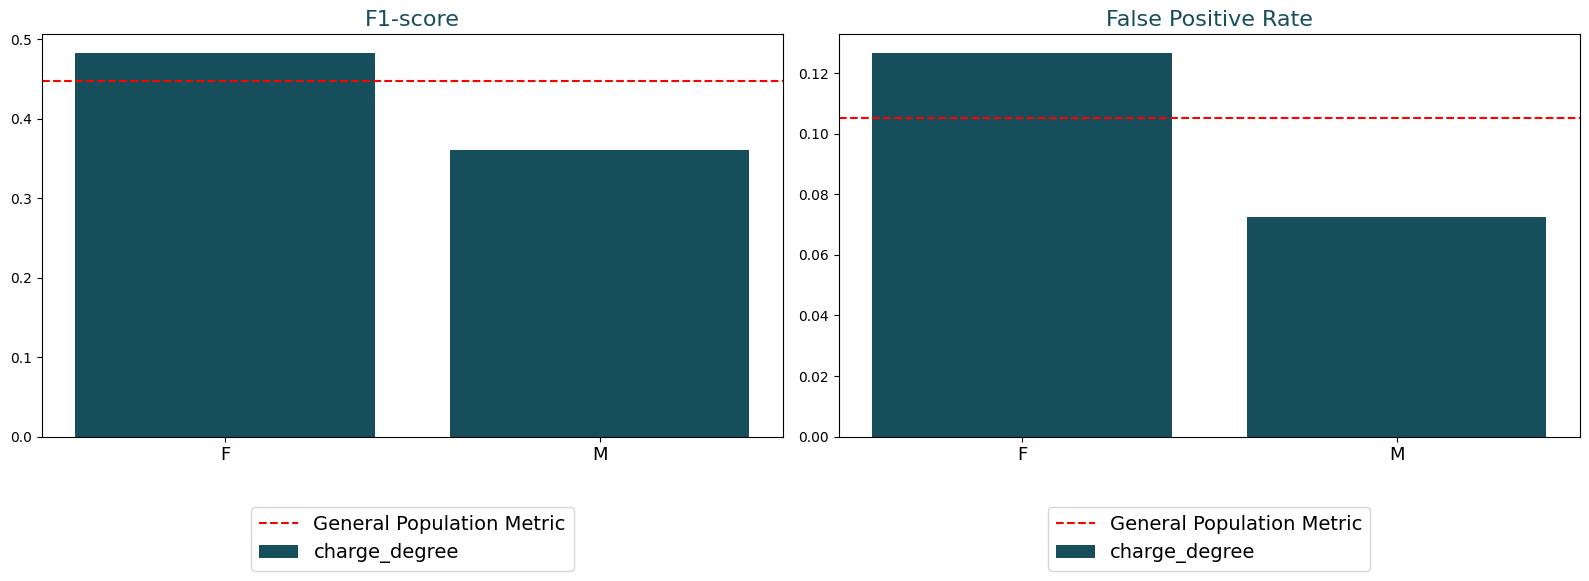

In [25]:
charge_degree_metrics.set_index('c_charge_degree', inplace=True)
charge_degree_metrics.index.name = 'charge_degree'
legend_local = 'lower right'
plot_category_metrics_with_general_overlay(charge_degree_metrics, df_general_population_metrics, primary_color, legend_local)

### 8. Baseline Model

In [26]:
# minimalist feature selection
#numeric_columns
#categorical_columns
#datetime_columns

target = ['composite_target']

baseline_features = ['age_group',
                     'juv_fel_count',
                     'juv_misd_count',
                     'juv_other_count',
                     'priors_count'
                     ]

numerical_features =  ['juv_fel_count',
                       'juv_misd_count',
                       'juv_other_count',
                       'priors_count'
                     ]

categorical_features =  ['age_group'
                     ]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from custom_transformers.lowercase_transformer import LowercaseTransformer


# build the pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('lowercase', LowercaseTransformer(categorical_features)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = make_pipeline(
    preprocessor,
    LogisticRegression()
    #RandomForestClassifier(max_depth=20, min_samples_leaf=.03, class_weight="balanced", random_state=42, n_jobs=-1)
    #GradientBoostingClassifier(learning_rate=1.0, max_depth=7, n_estimators=100)
    #XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')
    
)

### 9. DataSplitting

In [28]:
# train model
#df_train, df_test = train_test_split(data, test_size=0.4, random_state=42)

In [29]:
# Test with stratified sampling
# Create a stratification column
#data['stratify_col'] = data['race'].astype(str) + '_' + data['sex'].astype(str) + '_' + data['c_charge_degree'].astype(str)
data['stratify_col'] = data['race'].astype(str) + '_' + data['sex'].astype(str)
#data['stratify_col'] = data['race'].astype(str)


In [30]:
df_train, df_test = train_test_split(data, test_size=0.2, stratify=data['stratify_col'], random_state=42)

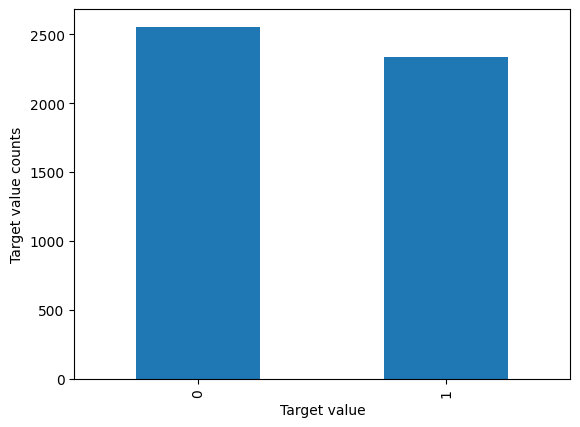

In [31]:
df_train['composite_target'].value_counts().plot(kind="bar");
plt.xlabel('Target value');
plt.ylabel('Target value counts');

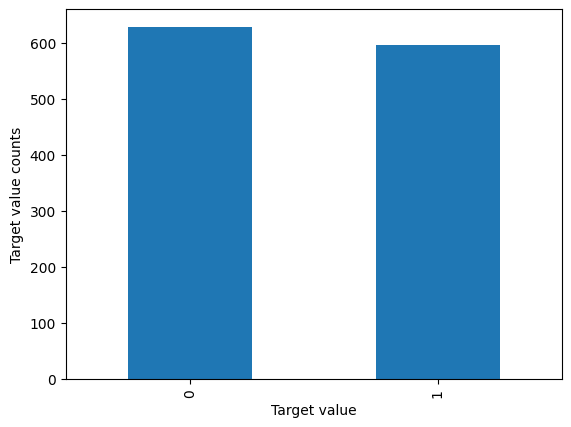

In [32]:
df_test['composite_target'].value_counts().plot(kind="bar");
plt.xlabel('Target value');
plt.ylabel('Target value counts');

In [33]:
# Train data
X_train = df_train[baseline_features]
y_train = df_train[target]

#### 10 Grid Parameter Search

#### 10. Model Training and Test Predictions 

In [34]:
# Fit the model
pipeline.fit(X_train, y_train)

# Test Data
X_test = df_test[baseline_features]
y_test = df_test[target]

# Make Predictions
y_pred = pipeline.predict(X_test)
y_train.shape

# Adjust the model true class classification threshold

# Predict probabilities for the test set
#probabilities = pipeline.predict_proba(X_test)[:, 1]

# Set a new threshold
#new_threshold = 0.51
#y_pred = (probabilities >= new_threshold).astype(int)

/Users/ricardocosta/.virtualenvs/s06/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(4891, 1)

### 10. Baseline Model Test Metrics

In [35]:
# Define the true labels and predictions
true_labels = y_test
predictions = y_pred

In [36]:
# reconstruct dataframe with predictions for metric evaluation
data_baseline_prediction = df_test.copy()
data_baseline_prediction['baseline_prediction'] = y_pred
data_baseline_prediction

name     sex        dob  age              race  \
id                                                                 
224   denzell mcfadden    Male 1992-05-11   23  African-American   
5415    brittany clark  Female 1993-10-26   22  African-American   
2117      cheryl smith  Female 1955-12-08   60         Caucasian   
3688    allyson kenney  Female 1986-06-20   29         Caucasian   
2167    abnel benjamin    Male 1990-05-01   25  African-American   
...                ...     ...        ...  ...               ...   
1208    charles delisi    Male 1964-05-10   51         Caucasian   
3320  jayson velazquez    Male 1983-11-27   32         Caucasian   
6043     james hawkins    Male 1984-08-07   31  African-American   
3277   octavius ruffin    Male 1994-02-09   22  African-American   
4339      kathy floris  Female 1958-02-08   58         Caucasian   

               c_jail_in          c_jail_out  c_case_number c_offense_date  \
id                                                                           
224  2013-04-27 05:08:36 2014-01-07 06:58:24  13006046CF10A     2013-04-27   
5415 2013-05-07 04:52:05 2013-05-08 01:00:04  13006538CF10A     2013-05-07   
2117 2014-06-22 07:29:36 2014-06-23 08:57:59  14008597CF10A     2014-06-22   
3688 2014-06-01 03:16:47 2014-06-03 10:28:03  14020222MU10A     2014-06-01   
2167 2013-02-08 11:08:45 2013-02-09 09:12:11  13001982CF10A     2013-02-08   
...                  ...                 ...            ...            ...   
1208 2013-08-11 08:16:15 2013-08-12 07:21:52  13015168MM10A     2013-08-11   
3320 2013-02-04 02:21:57 2013-02-05 03:52:27  12003937MM10A     2012-02-26   
6043 2014-06-25 08:30:12 2014-06-27 08:56:53  12006180CF10A            NaT   
3277 2014-06-19 08:05:05 2014-06-20 08:29:14  14008486CF10A     2014-06-19   
4339 2013-06-21 12:44:56 2013-06-21 07:42:46  13011894MM10A     2013-06-20   

     c_arrest_date  ... vr_case_number vr_offense_date  vr_charge_degree  \
id                  ...                                                    
224            NaT  ...            NaN             NaT               NaN   
5415           NaT  ...            NaN             NaT               NaN   
2117           NaT  ...            NaN             NaT               NaN   
3688           NaT  ...            NaN             NaT               NaN   
2167           NaT  ...            NaN             NaT               NaN   
...            ...  ...            ...             ...               ...   
1208           NaT  ...            NaN             NaT               NaN   
3320           NaT  ...            NaN             NaT               NaN   
6043    2014-06-25  ...            NaN             NaT               NaN   
3277           NaT  ...            NaN             NaT               NaN   
4339           NaT  ...            NaN             NaT               NaN   

      vr_charge_desc  two_year_recid  compass_recidivism_prediction age_group  \
id                                                                              
224              NaN               1                              1     21-24   
5415             NaN               0                              0     21-24   
2117             NaN               1                              0     55-64   
3688             NaN               1                              0     25-34   
2167             NaN               1                              0     25-34   
...              ...             ...                            ...       ...   
1208             NaN               0                              0     45-54   
3320             NaN               1                              0     25-34   
6043             NaN               1                              0     25-34   
3277             NaN               1                              0     21-24   
4339             NaN               0                              0     55-64   

     composite_target             stratify_col baseline_prediction  
id    

#### 10.1 General Population Metrics

In [37]:
baseline_general_population_metrics = calculate_metrics(true_labels, predictions)
baseline_general_population_metrics

F1-score  False Positive Rate
General Population Metrics  0.658088             0.214968

In [38]:
print(len(y_pred))

1223


#### 10.2 Metrics Across Race 

In [39]:
race_metrics = calculate_group_metrics(data_baseline_prediction, 'race', 'composite_target', 'baseline_prediction')
race_metrics

race  F1-score  False Positive Rate
0  African-American  0.722140             0.302158
1             Asian  1.000000             0.000000
2         Caucasian  0.558621             0.140496
3          Hispanic  0.538462             0.171875
4   Native American  1.000000             0.000000
5             Other  0.461538             0.146341

#### 10.3 Metrics Across Gender 

In [40]:
gender_metrics = calculate_group_metrics(data_baseline_prediction, 'sex', 'composite_target', 'baseline_prediction')
gender_metrics

sex  F1-score  False Positive Rate
0  Female  0.567568             0.151316
1    Male  0.672340             0.235294

#### 10.4 Metrics Across Criminal Charge Degree

In [41]:
charge_degree_metrics = calculate_group_metrics(data_baseline_prediction, 'c_charge_degree', 'composite_target', 'baseline_prediction')
charge_degree_metrics

c_charge_degree  F1-score  False Positive Rate
0               F  0.685714             0.265092
1               M  0.591195             0.137652

In [42]:
##calculate optimized threshold
#find best model
#feature engineering (transform dates, count number days in jail, total )

### Pickle the model for deployment

In [ ]:
import joblib
import json
import pickle

# Serialization
TMP_DIR = ''
# Serialize the column names from the X DataFrame into a file named columns.json
# YOUR CODE HERE
with open(os.path.join(TMP_DIR, "columns.json"), 'w') as fh:
    json.dump(X_train.columns.tolist(), fh)

# Pickle the dtypes of the columns from the X DataFrame into a file named dtypes.pickle
# YOUR CODE HERE
with open(os.path.join(TMP_DIR,'dtypes.pickle'), 'wb') as fh:
    pickle.dump(X_train.dtypes, fh)
    
# Pickle the fitted pipeline into a file named pipeline.pickle
# YOUR CODE HERE
import joblib
joblib.dump(pipeline, os.path.join(TMP_DIR,'pipeline.pickle'))